In [1]:
pip install tensorflow keras matplotlib


In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 
import numpy as np

C:\Users\simra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


C:\Users\simra\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 31ms/step - accuracy: 0.6879 - loss: 0.8316 - val_accuracy: 0.8476 - val_loss: 0.4170
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8174 - loss: 0.4763 - val_accuracy: 0.8674 - val_loss: 0.3478
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8476 - loss: 0.4021 - val_accuracy: 0.8716 - val_loss: 0.3402
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8604 - loss: 0.3700 - val_accuracy: 0.8830 - val_loss: 0.3177
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8709 - loss: 0.3433 - val_accuracy: 0.8873 - val_loss: 0.3183
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8743 - loss: 0.3337 - val_accuracy: 0.8839 - val_loss: 0.3091
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8809 - loss: 0.3142 - val_accuracy: 0.8938 - val_loss: 0.2864
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8833 - loss: 0.31

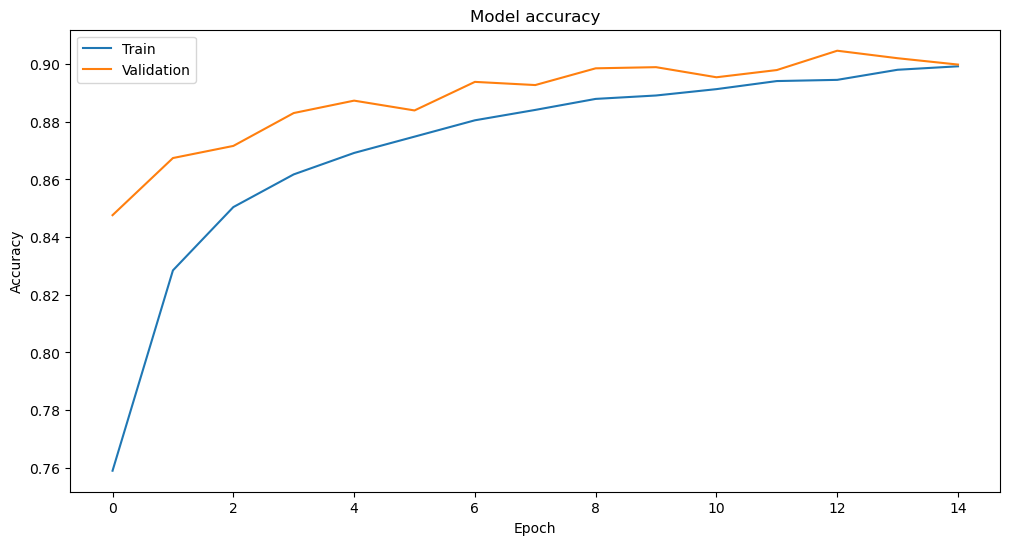

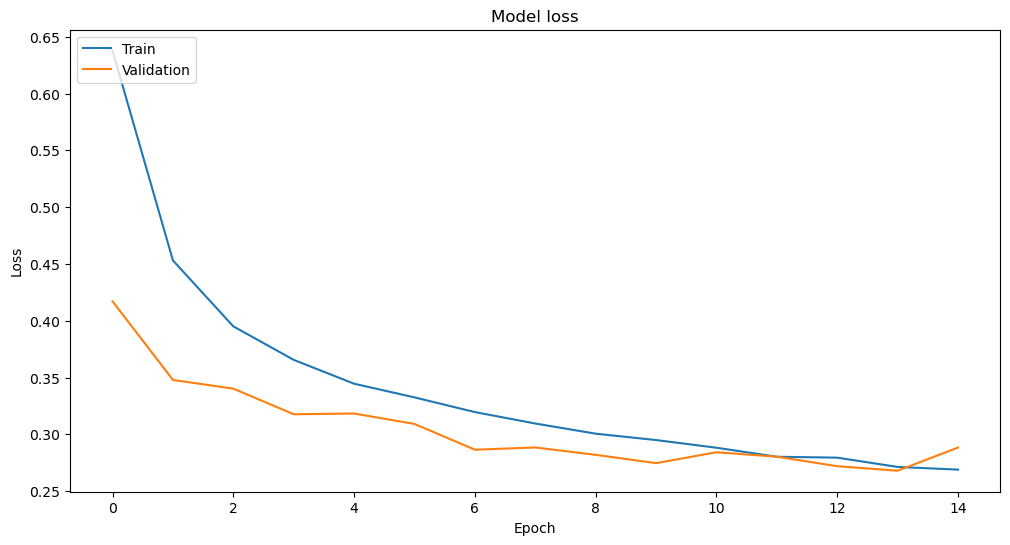

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


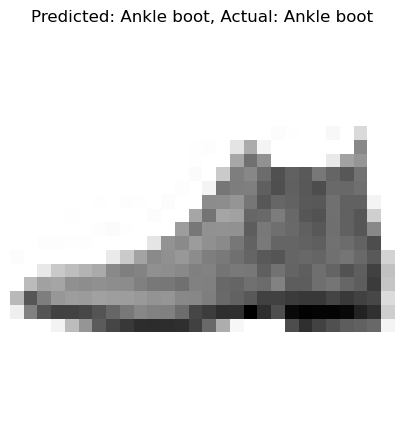

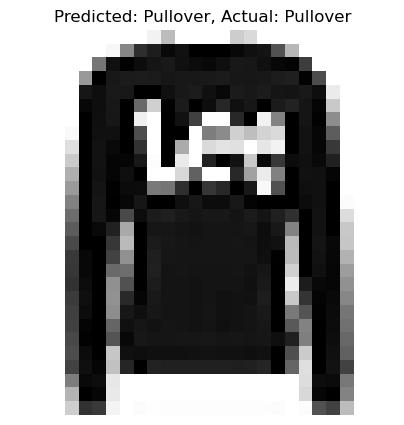

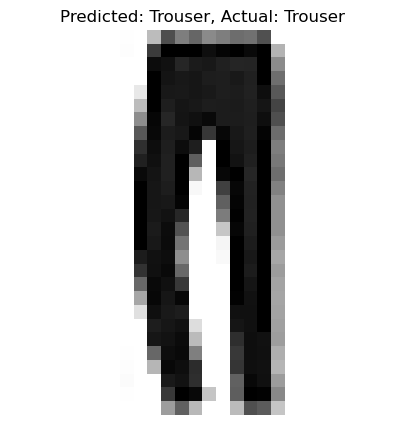

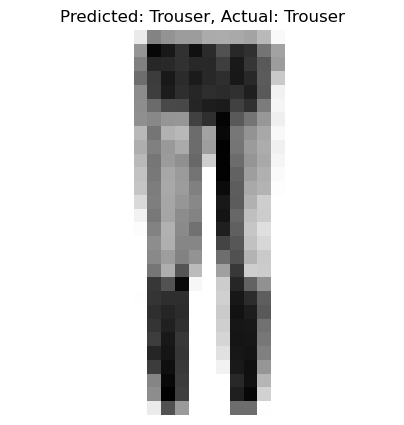

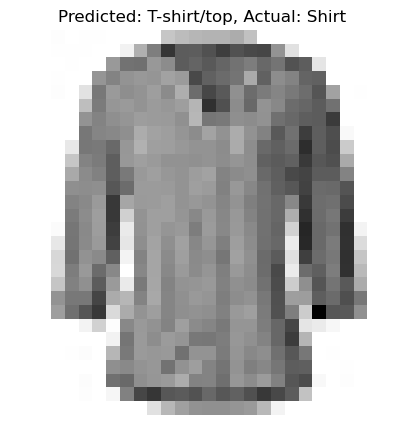

In [3]:
# Load and preprocess the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# Reshape the images to add an extra dimension (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Create an Image Data Generator with Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(train_images)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(test_images, test_labels),
                    epochs=15)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions
predictions = model.predict(test_images[:5])

# Display the predictions
for i in range(5):
    plt.figure(figsize=(5, 5))
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()
